In [1]:
import pandas as pd

In [6]:
data=pd.read_csv('femalebirths (1).csv',parse_dates=[0])
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [9]:
data.isnull().sum()

date      0
births    0
dtype: int64

In [12]:
#converting to series
series=pd.read_csv('femalebirths (1).csv',parse_dates=[0],index_col=0,squeeze=True)

C:\Users\anjuc\AppData\Local\Temp\ipykernel_14960\928456298.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series=pd.read_csv('femalebirths (1).csv',parse_dates=[0],index_col=0,squeeze=True)


In [13]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [14]:
series.shape

(365,)

In [15]:
#to display data from january
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [16]:
#details in the year 1959
print(series['1959'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64


In [17]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [18]:
import matplotlib.pyplot as plt
#visualization is very important here
#here time plot=line plot in matplotlib

<AxesSubplot:>

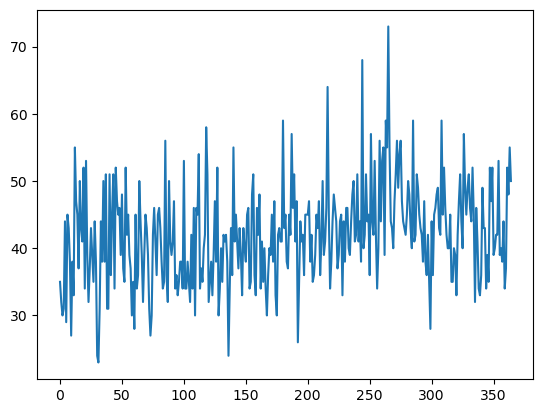

In [20]:
data['births'].plot()

<AxesSubplot:xlabel='date'>

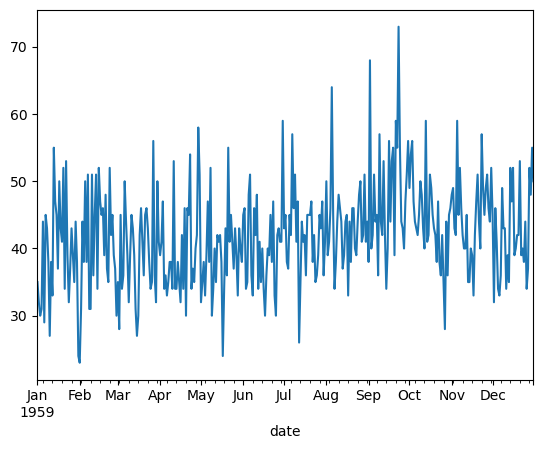

In [21]:
#giving x axis
data.index=data['date']
data['births'].plot()

In [22]:
#zooming of time plot

<AxesSubplot:xlabel='date'>

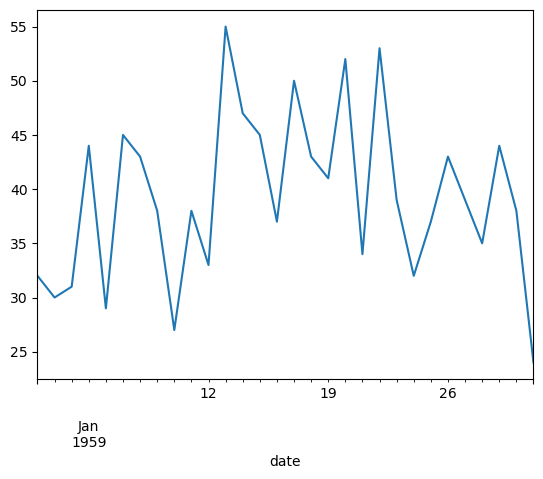

In [28]:
data2=data[(data['date']>'1959-01-01')&(data['date']<='1959-01-31')]
data2['births'].plot()

In [29]:
import seaborn as sns

In [31]:
data_copy=pd.read_csv('femalebirths (1).csv',parse_dates=[0])
data_copy.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:ylabel='births'>

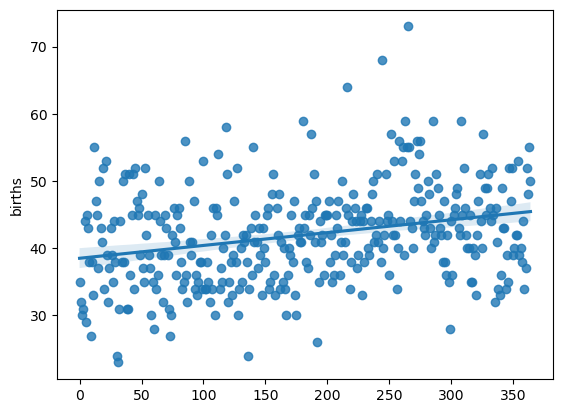

In [32]:
sns.regplot(x=data_copy.index.values,y=data_copy['births'])#to see trend it can increase or decrease

In [33]:
ds=pd.read_csv('aircraftmiles (1).csv',parse_dates=[0])

In [34]:
ds.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

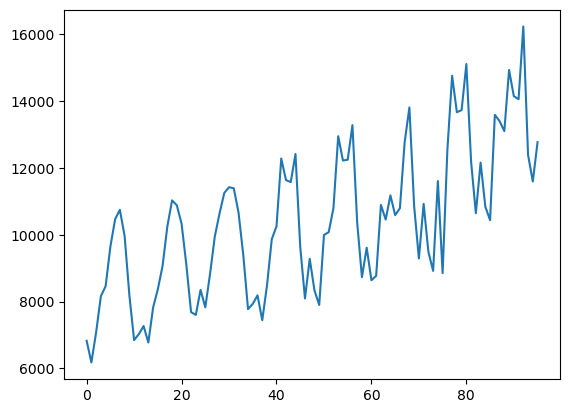

In [35]:
ds['MilesMM'].plot() #graph with seasonality

<AxesSubplot:ylabel='MilesMM'>

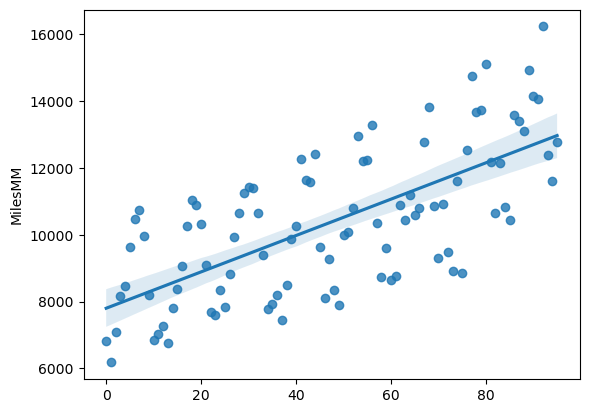

In [36]:
sns.regplot(x=ds.index.values,y=ds['MilesMM'])

trends and seasonality

In [38]:
ds['years']=ds['Month'].dt.year

In [39]:
ds.head()

,Month,MilesMM,years
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [ ]:
#removing seasonality done by finding mean

In [40]:
ds.groupby('years').mean()['MilesMM']

years
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='years'>

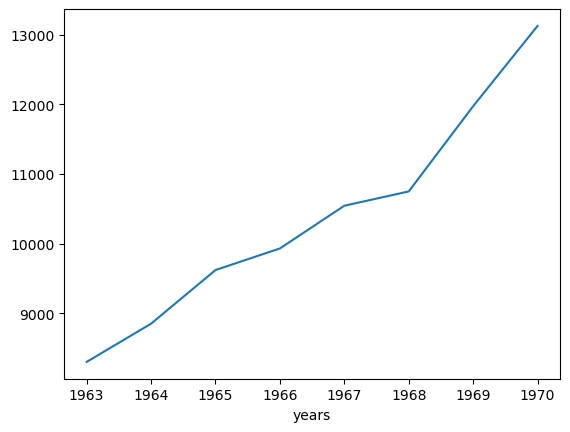

In [41]:
ds.groupby('years').mean()['MilesMM'].plot()

##creating lag plot shifting value of an instant to the next level as the value of the next instant
shift1---one level is nan
shift2----two level is nan

but for prediction using timeseries correlation between the two column is compulsory

In [42]:
ds['lag']=ds['MilesMM'].shift(1)

In [43]:
ds.head()

,Month,MilesMM,years,lag
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag', ylabel='MilesMM'>

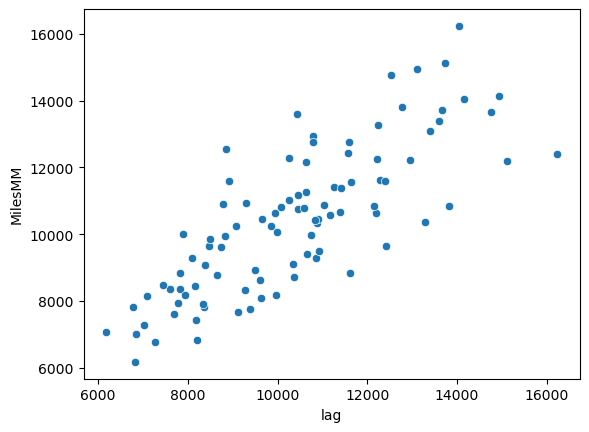

In [45]:
sns.scatterplot(x=ds['lag'],y=ds['MilesMM'])#to find corrilation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

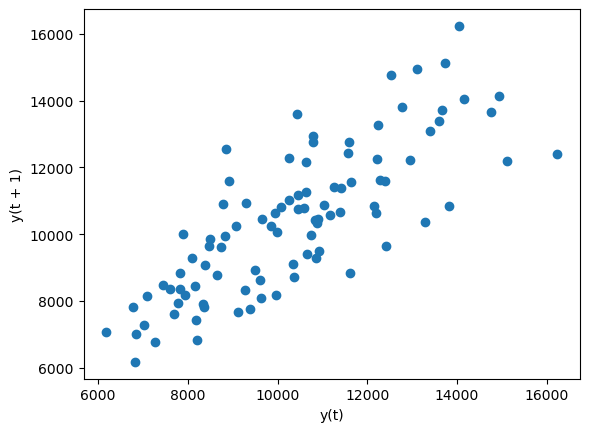

In [48]:
#alternate method
from pandas.plotting import lag_plot
lag_plot(ds['MilesMM'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

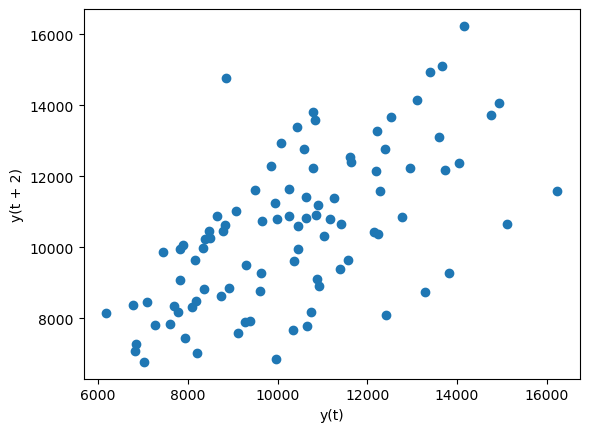

In [49]:
lag_plot(ds['MilesMM'],lag=2)

In [50]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

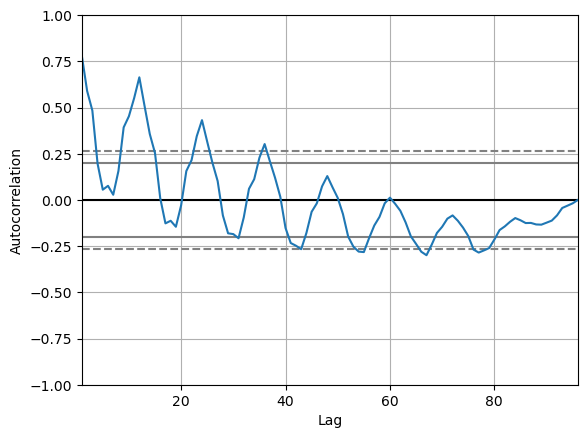

In [51]:
autocorrelation_plot(ds['MilesMM']) 
#the defenition of autocorrilation was the relationship /correlation of a time series with it's prevoous versions in time.
#since we need two variables to compute vcorrelation, but in a time series we have only one variable, we need to compute the correlation of time series with a k th lagged version of itself

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
result=seasonal_decompose(ds['MilesMM'],model='additive',period=1)

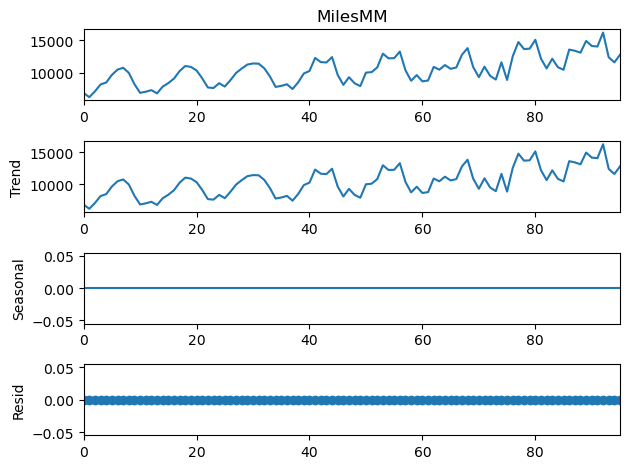

In [55]:
result.plot()
plt.show()